- Welcome to Quantitative and High Frequency Trading Training Program


In [153]:
from helper import *
from stats import *
from imp import reload   
import helper
import stats
reload(helper)
reload(stats)
evaluate_signal

<function helper.evaluate_signal(signal, all_dates, product, min_pnl, min_num, HEAD_PATH, CORE_NUM, period=4096, split_str='2018', tranct=0.00011, max_spread=0.61, tranct_ratio=True, atr_filter=0, save_path='signal result')>

- number of cores, set this number according to your computer

In [2]:
CORE_NUM = int(os.environ['NUMBER_OF_PROCESSORS'])
CORE_NUM

16

- sample product, you can change to your specific product symbol

In [3]:
product_list = ["rb", "hc", "i", "j", "jm"]

In [4]:
import dask
from dask import compute, delayed

- sample period

In [5]:
period = 4096

In [6]:
all_dates = os.listdir(DATA_PATH + product_list[0])
all_dates.sort()
all_dates = np.array(all_dates)
n_days = len(all_dates)
n_days

915

- choose an example day

In [7]:
train_sample = all_dates<"2018"

test_sample = all_dates>"2018"


In [8]:
date_str = [n[0:8] for n in all_dates]
format_dates = np.array([pd.to_datetime(d) for d in date_str])

- at last we plot the selected pnl

- now we can see that the number of signals are not very big
- and the quality is not so good
- we can propose a systematic method to generate a large number of signals then
- we can choose good ones from them

- for example, we can first generate some signals about volatility without direction
- there are some ideas about it

- standard deviation
- range of price
- ratio of volume to turnover

- then we can generate some signals with direction
- actually all of our previous signals have direction
- but some of them are good and some of them are bad
- we can focus on some good and simple ones, such as

- normalized return
- rsi
- dbook

- let's try to generate range signals first

In [8]:
from collections import OrderedDict
class foctor_std_period(factor_template):
    factor_name = "std.period"
    
    params = OrderedDict([
        ("period", np.power(2, range(10,13)))
    ])
    
    def formula(self, data, period):
        return np.sqrt(fast_roll_var(data["wpr"], period))

In [9]:
x20 = foctor_std_period()
for product in product_list:
    create_signal_path(x20, product, HEAD_PATH);

d:/intern/tmp pkl/rb/std.1024
d:/intern/tmp pkl/rb/std.2048
d:/intern/tmp pkl/rb/std.4096
d:/intern/tmp pkl/hc/std.1024
d:/intern/tmp pkl/hc/std.2048
d:/intern/tmp pkl/hc/std.4096
d:/intern/tmp pkl/i/std.1024
d:/intern/tmp pkl/i/std.2048
d:/intern/tmp pkl/i/std.4096
d:/intern/tmp pkl/j/std.1024
d:/intern/tmp pkl/j/std.2048
d:/intern/tmp pkl/j/std.4096
d:/intern/tmp pkl/jm/std.1024
d:/intern/tmp pkl/jm/std.2048
d:/intern/tmp pkl/jm/std.4096


In [16]:
from collections import OrderedDict
class foctor_range_period(factor_template):
    factor_name = "range.period"
    
    params = OrderedDict([
        ("period", np.power(2, range(10,13)))
    ])
    
    def formula(self, data, period):
        return data["max."+str(period)]-data["min."+str(period)]

In [38]:
x21 = foctor_range_period()
for product in product_list:
    create_signal_path(x21, product, HEAD_PATH);

d:/intern/tmp pkl/rb/range.1024
d:/intern/tmp pkl/rb/range.2048
d:/intern/tmp pkl/rb/range.4096
d:/intern/tmp pkl/hc/range.1024
d:/intern/tmp pkl/hc/range.2048
d:/intern/tmp pkl/hc/range.4096
d:/intern/tmp pkl/i/range.1024
d:/intern/tmp pkl/i/range.2048
d:/intern/tmp pkl/i/range.4096
d:/intern/tmp pkl/j/range.1024
d:/intern/tmp pkl/j/range.2048
d:/intern/tmp pkl/j/range.4096
d:/intern/tmp pkl/jm/range.1024
d:/intern/tmp pkl/jm/range.2048
d:/intern/tmp pkl/jm/range.4096


In [37]:
from collections import OrderedDict
class foctor_volume_open_ratio_period(factor_template):
    factor_name = "volume.open.ratio.period"
    
    params = OrderedDict([
        ("period", np.power(2, range(10,13)))
    ])
    
    def formula(self, data, period):
        return zero_divide(cum(data["qty"],period), cum(data["cum.open.int"]/period,period))

In [39]:
x22 = foctor_volume_open_ratio_period()
for product in product_list:
    create_signal_path(x22, product, HEAD_PATH);


d:/intern/tmp pkl/rb/volume.open.ratio.1024
d:/intern/tmp pkl/rb/volume.open.ratio.2048
d:/intern/tmp pkl/rb/volume.open.ratio.4096
d:/intern/tmp pkl/hc/volume.open.ratio.1024
d:/intern/tmp pkl/hc/volume.open.ratio.2048
d:/intern/tmp pkl/hc/volume.open.ratio.4096
d:/intern/tmp pkl/i/volume.open.ratio.1024
d:/intern/tmp pkl/i/volume.open.ratio.2048
d:/intern/tmp pkl/i/volume.open.ratio.4096
d:/intern/tmp pkl/j/volume.open.ratio.1024
d:/intern/tmp pkl/j/volume.open.ratio.2048
d:/intern/tmp pkl/j/volume.open.ratio.4096
d:/intern/tmp pkl/jm/volume.open.ratio.1024
d:/intern/tmp pkl/jm/volume.open.ratio.2048
d:/intern/tmp pkl/jm/volume.open.ratio.4096


In [12]:
from collections import OrderedDict
class foctor_trend_index_period(factor_template):
    factor_name = "trend.index.period"
    
    params = OrderedDict([
        ("period", np.power(2, range(10,13)))
    ])
    
    def formula(self, data, period):
        aa = zero_divide(abs(data["wpr"]-data["wpr"].shift(period)), data["max."+str(period)]-data["min."+str(period)])
        aa[0:period]=0
        return aa

In [14]:
x23 = foctor_trend_index_period()
for product in product_list:
    create_signal_path(x23, product, HEAD_PATH);


d:/intern/tmp pkl/rb/trend.index.1024
d:/intern/tmp pkl/rb/trend.index.2048
d:/intern/tmp pkl/rb/trend.index.4096
d:/intern/tmp pkl/hc/trend.index.1024
d:/intern/tmp pkl/hc/trend.index.2048
d:/intern/tmp pkl/hc/trend.index.4096
d:/intern/tmp pkl/i/trend.index.1024
d:/intern/tmp pkl/i/trend.index.2048
d:/intern/tmp pkl/i/trend.index.4096
d:/intern/tmp pkl/j/trend.index.1024
d:/intern/tmp pkl/j/trend.index.2048
d:/intern/tmp pkl/j/trend.index.4096
d:/intern/tmp pkl/jm/trend.index.1024
d:/intern/tmp pkl/jm/trend.index.2048
d:/intern/tmp pkl/jm/trend.index.4096


- Then we construt these range signals 

In [21]:
%%time
for product in product_list:
    file_list = list(map(lambda x: DATA_PATH+product+"/"+x, os.listdir(DATA_PATH + product)))
    parLapply(CORE_NUM, file_list, build_composite_signal,signal_list=x20, product=product, HEAD_PATH=HEAD_PATH)
;
# Wall time: 15min 41s


Wall time: 15min 41s


In [22]:
%%time
for product in product_list:
    file_list = list(map(lambda x: DATA_PATH+product+"/"+x, os.listdir(DATA_PATH + product)))
    parLapply(CORE_NUM, file_list, build_composite_signal,signal_list=x21, product=product, HEAD_PATH=HEAD_PATH)
;

#Wall time: 2min 48s

Wall time: 2min 48s


In [40]:
%%time
for product in product_list:
    file_list = list(map(lambda x: DATA_PATH+product+"/"+x, os.listdir(DATA_PATH + product)))
    parLapply(CORE_NUM, file_list, build_composite_signal,signal_list=x22, product=product, HEAD_PATH=HEAD_PATH)
;
# Wall time: 3min 41s


Wall time: 3min 41s


In [15]:
%%time
for product in product_list:
    file_list = list(map(lambda x: DATA_PATH+product+"/"+x, os.listdir(DATA_PATH + product)))
    parLapply(CORE_NUM, file_list, build_composite_signal,signal_list=x23, product=product, HEAD_PATH=HEAD_PATH)
;

Wall time: 3min 32s


- Now we can combine directional signals and range signals together to become new direction signals

- For example, we have n directional signals, and m range signals, 
- then we can generate new n*m directional signals

In [9]:
def construct_composite_signal(dire_signal, range_signal, period_list, date_list, product_list, HEAD_PATH):
    from collections import OrderedDict
    class foctor_xx_period(factor_template):
        factor_name = dire_signal+"."+range_signal+".period"
        params = OrderedDict([
            ("period", period_list)
        ])
        def formula(self, data, period):
            return (data[dire_signal+"."+str(period)]*data[range_signal+"."+str(period)]).values
    xx = foctor_xx_period()
    for product in product_list:
        create_signal_path(xx, product, HEAD_PATH)
        file_list = [DATA_PATH+product+"/"+date for date in date_list]
        parLapply(CORE_NUM, file_list, build_composite_signal,signal_list=xx, product=product, HEAD_PATH=HEAD_PATH)

In [10]:
dire_signal_list = ["trade.imb", "total.trade.imb", "nr", "dbook", "range.pos", "price.osci", "ma.dif.10", "kdj.k", "kdj.j"]
range_signal_list = ["range", "std", "volume.open.ratio", "trend.index"]
period_list = np.power(2, range(10,13))

In [20]:
%%time
for range_signal in range_signal_list:
    for dire_signal in dire_signal_list:
        construct_composite_signal(dire_signal, range_signal, period_list, all_dates, product_list, HEAD_PATH)

d:/intern/tmp pkl/rb/trade.imb.trend.index.1024
d:/intern/tmp pkl/rb/trade.imb.trend.index.2048
d:/intern/tmp pkl/rb/trade.imb.trend.index.4096
d:/intern/tmp pkl/hc/trade.imb.trend.index.1024
d:/intern/tmp pkl/hc/trade.imb.trend.index.2048
d:/intern/tmp pkl/hc/trade.imb.trend.index.4096
d:/intern/tmp pkl/i/trade.imb.trend.index.1024
d:/intern/tmp pkl/i/trade.imb.trend.index.2048
d:/intern/tmp pkl/i/trade.imb.trend.index.4096
d:/intern/tmp pkl/j/trade.imb.trend.index.1024
d:/intern/tmp pkl/j/trade.imb.trend.index.2048
d:/intern/tmp pkl/j/trade.imb.trend.index.4096
d:/intern/tmp pkl/jm/trade.imb.trend.index.1024
d:/intern/tmp pkl/jm/trade.imb.trend.index.2048
d:/intern/tmp pkl/jm/trade.imb.trend.index.4096
d:/intern/tmp pkl/rb/total.trade.imb.trend.index.1024
d:/intern/tmp pkl/rb/total.trade.imb.trend.index.2048
d:/intern/tmp pkl/rb/total.trade.imb.trend.index.4096
d:/intern/tmp pkl/hc/total.trade.imb.trend.index.1024
d:/intern/tmp pkl/hc/total.trade.imb.trend.index.2048
d:/intern/tmp pk

- Now we can combine signals of each day in to a vector
- here we use 4096 as period
- so to keep them independent, we choose 1 out of every 4096 points

In [11]:
period = 4096
os.makedirs(HEAD_PATH+"/all signal", exist_ok=True)
dire_signal_list = ["trade.imb", "total.trade.imb", "nr", "dbook", "range.pos", "price.osci", "ma.dif.10", "kdj.k", "kdj.j"]
range_signal_list = ["", "range", "std", "volume.open.ratio", "trend.index"]
all_signal_list = np.array([])
for range_signal in range_signal_list:
    for dire_signal in dire_signal_list:
        if len(range_signal)==0:
            signal_name = dire_signal
        else:
            signal_name = dire_signal+"."+range_signal
        all_signal_list = np.append(all_signal_list,signal_name)
all_period_signal = [signal+".4096" for signal in all_signal_list]
len(all_period_signal)
## 45

45

- we have 9 directional (trend) signals and 4 range signals
- so we have 36 composite signals 
- plus the 9 original ones we have 45 signals together


In [34]:
%%time
for product in product_list:
    parLapply(CORE_NUM, all_period_signal, par_get_all_signal, file_list=all_dates, product=product, period=4096, HEAD_PATH=HEAD_PATH);
# Wall time: 21min 53s


Wall time: 2min 17s


- then we can backtest our signals 
- we save the results

In [154]:
%%time
for product in product_list:
    spread = product_info[product]["spread"]
    for signal in all_signal_list:
        print(product, signal)
        evaluate_signal(signal, all_dates, product, 2, 20, HEAD_PATH, 
                CORE_NUM, period=4096, split_str="2018", tranct=1.1e-4, 
                max_spread=spread+0.1, tranct_ratio=True, atr_filter=20, 
                        save_path="signal result atr")


rb trade.imb


FileNotFoundError: [Errno 2] No such file or directory: 'd:/intern/all signal/rb.trade.imb.comb.pkl'

rb trade.imb
reverse=1
no good strategy!
reverse=-1
good strategies: 
 0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
      ... 
60    True
61    True
62    True
63    True
64    True
65    True
66    True
67    True
68    True
69    True
70    True
71    True
72    True
73    True
74    True
75    True
76    True
77    True
78    True
79    True
80    True
81    True
82    True
83    True
84    True
85    True
86    True
87    True
88    True
89    True
Length: 90, dtype: bool 

train sharpe:  0.9478340275431169 

test sharpe:  0.38314884760166507 

rb total.trade.imb
reverse=1
good strategies: 
 0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10

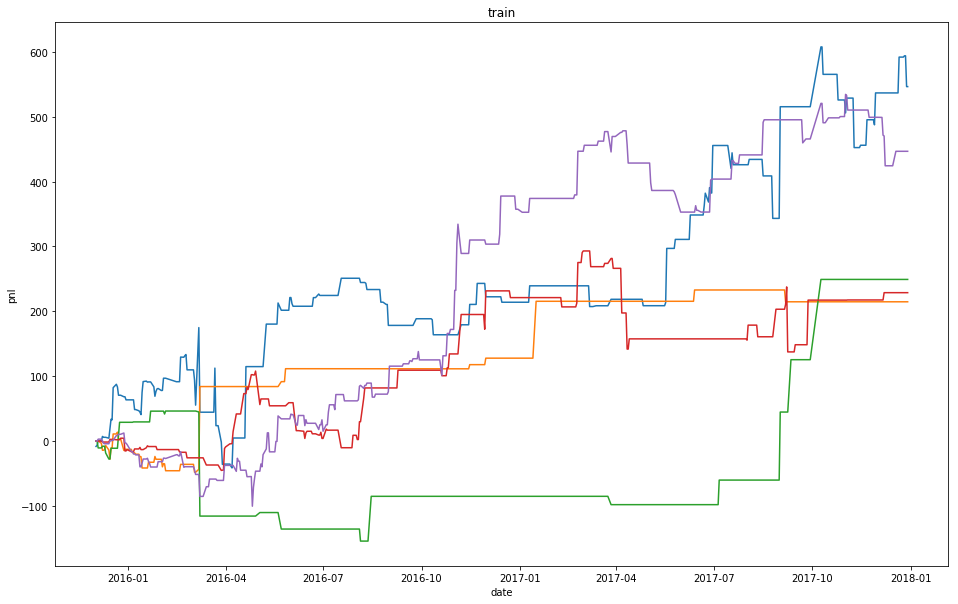

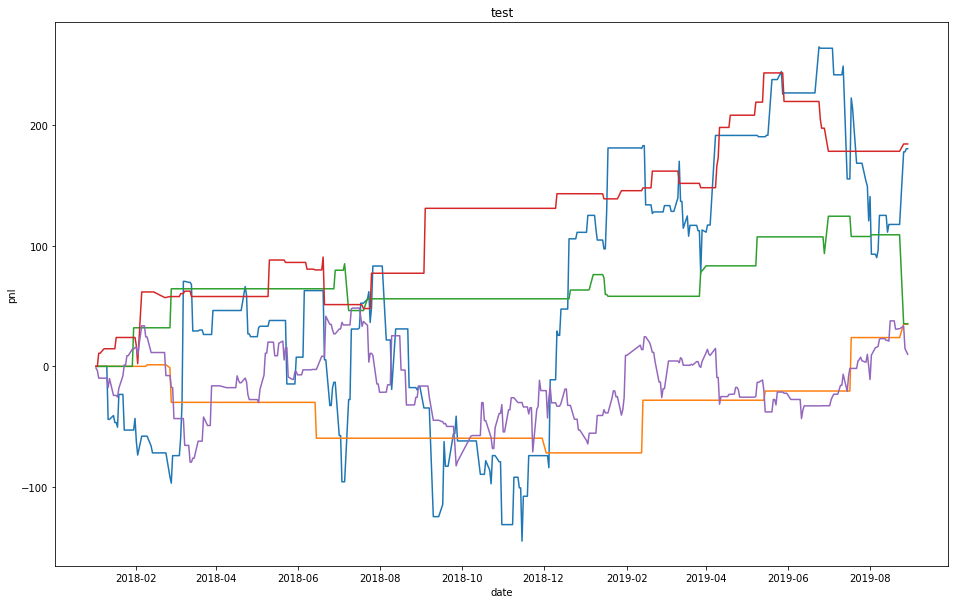

In [47]:
%%time
for product in product_list:
    spread = product_info[product]["spread"]
    for dire_signal in all_signal_list[0:2]:
        signal = dire_signal
        print(product, signal)
        evaluate_signal(signal, all_dates, product, 2, 20, HEAD_PATH, 
                CORE_NUM, period=4096, split_str="2018", tranct=1.1e-4, 
                max_spread=spread+0.1, tranct_ratio=True, atr_filter=0)

- we can write a function to get all the signals' performance

In [121]:
def get_signal_performance_result(all_period_signal, signal_dire, period, product_list):
    trend_signal_result = pd.DataFrame(data=OrderedDict([("signal", all_period_signal), ("reverse",1),
                               ("num", 0), ("trainSharpe", 0), ("testSharpe", 0)]))
    reverse_signal_result = pd.DataFrame(data=OrderedDict([("signal", all_period_signal), ("reverse",-1),
                               ("num", 0), ("trainSharpe", 0), ("testSharpe", 0)]))
    n_signal = len(all_period_signal)
    for k in range(n_signal):
        test_all_pnl = np.zeros([sum(test_sample), len(product_list)])
        train_all_pnl = np.zeros([sum(train_sample), len(product_list)])
        signal_name = all_period_signal[k]
        i = 0
        for product in product_list:
            stat_result = load(HEAD_PATH+"/" + signal_dire +"/"+product+"."+signal_name+".pkl")
            trend_signal_stat = stat_result['trend.signal.stat']
            spread = product_info[product]["spread"]
            if tuple(trend_signal_stat.keys())[0]=='train.stat':
                train_stat = trend_signal_stat["train.stat"]
                test_stat = trend_signal_stat["test.stat"]
                #good_strat = trend_signal_stat["good.strat"]
                good_strat = (train_stat["final.result"]["avg.pnl"]>2*spread) & (train_stat["final.result"]["num"]>10)
                if sum(good_strat)>2:
                    train_stat = trend_signal_stat["train.stat"]
                    test_stat = trend_signal_stat["test.stat"]
                    train_pnl = train_stat["daily.pnl"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
                    train_std = np.std(train_pnl)
                    train_pnl = train_pnl/train_std
                    test_pnl = test_stat["daily.pnl"].loc[:, good_strat].sum(axis=1)/sum(good_strat)/train_std
                    #print(product, "train sharpe ", sharpe(train_pnl), "test sharpe ", sharpe(test_pnl))
                    test_all_pnl[:,i] = test_pnl
                    train_all_pnl[:,i] = train_pnl
                    i = i+1
            if i>0:
                train_portfolio = np.array(np.mean(train_all_pnl[:,0:i], axis=1))
                test_portfolio = np.array(np.mean(test_all_pnl[:,0:i], axis=1))
                all_portfolio = np.append(train_portfolio, test_portfolio)
                trend_signal_result.loc[k, ("signal", "num", "trainSharpe", "testSharpe")] = (signal_name, i,  sharpe(train_portfolio),sharpe(test_portfolio))
        test_all_pnl = np.zeros([sum(test_sample), len(product_list)])
        train_all_pnl = np.zeros([sum(train_sample), len(product_list)])
        i = 0
        for product in product_list:
            stat_result = load(HEAD_PATH+"/"+signal_dire+"/"+product+"."+signal_name+".pkl")
            reverse_signal_stat = stat_result['reverse.signal.stat']
            spread = product_info[product]["spread"]
            if tuple(reverse_signal_stat.keys())[0]=='train.stat':
                #good_strat = reverse_signal_stat["good.strat"]
                train_stat = reverse_signal_stat["train.stat"]
                test_stat = reverse_signal_stat["test.stat"]
                good_strat = (train_stat["final.result"]["avg.pnl"]>2*spread) & (train_stat["final.result"]["num"]>10)
                if sum(good_strat)>2:
                    train_pnl = train_stat["daily.pnl"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
                    train_std = np.std(train_pnl)
                    train_pnl = train_pnl/train_std
                    test_pnl = test_stat["daily.pnl"].loc[:, good_strat].sum(axis=1)/sum(good_strat)/train_std
                    test_all_pnl[:,i] = test_pnl
                    train_all_pnl[:,i] = train_pnl
                    i = i+1
            if i>0:
                train_portfolio = np.array(np.mean(train_all_pnl[:,0:i], axis=1))
                test_portfolio = np.array(np.mean(test_all_pnl[:,0:i], axis=1))
                all_portfolio = np.append(train_portfolio, test_portfolio)
                reverse_signal_result.loc[k, ("signal","num", "trainSharpe", "testSharpe")] = (signal_name, i, sharpe(train_portfolio),sharpe(test_portfolio))
    return OrderedDict([("trend.signal.stat", trend_signal_result), 
                        ("reverse.signal.stat", reverse_signal_result)])
                        
        


- we can get the result with atr and without atr separately

In [122]:
result = get_signal_performance_result(all_period_signal, "signal result", 4096, product_list)

In [123]:
result_atr = get_signal_performance_result(all_period_signal, "signal result atr", 4096, product_list)

In [124]:
min_num=0
good_trend = (result["trend.signal.stat"]["num"]>min_num) & (result["trend.signal.stat"]["trainSharpe"]>1) & (result["trend.signal.stat"]["testSharpe"]>0.5)
good_reverse = (result["reverse.signal.stat"]["num"]>min_num) & (result["reverse.signal.stat"]["trainSharpe"]>1) & (result["reverse.signal.stat"]["testSharpe"]>0.5)
train_sharpe = np.mean(np.append(result["trend.signal.stat"]["trainSharpe"][good_trend],
                  result["reverse.signal.stat"]["trainSharpe"][good_reverse]))
test_sharpe = np.mean(np.append(result["trend.signal.stat"]["testSharpe"][good_trend],
                  result["reverse.signal.stat"]["testSharpe"][good_reverse]))
print("without atr good signals: ",sum(good_trend | good_reverse))
print("train sharpe: ", train_sharpe)
print("test sharpe: ", test_sharpe)
good_trend = (result_atr["trend.signal.stat"]["num"]>min_num) & (result_atr["trend.signal.stat"]["trainSharpe"]>1) & (result_atr["trend.signal.stat"]["testSharpe"]>0.5)
good_reverse = (result_atr["reverse.signal.stat"]["num"]>min_num) & (result_atr["reverse.signal.stat"]["trainSharpe"]>1) & (result_atr["reverse.signal.stat"]["testSharpe"]>0.5)
print("with atr good signals: "+ str(sum(good_trend | good_reverse)))
train_sharpe = np.mean(np.append(result_atr["trend.signal.stat"]["trainSharpe"][good_trend],
                  result_atr["reverse.signal.stat"]["trainSharpe"][good_reverse]))
test_sharpe = np.mean(np.append(result_atr["trend.signal.stat"]["testSharpe"][good_trend],
                  result_atr["reverse.signal.stat"]["testSharpe"][good_reverse]))
print("train sharpe: ", train_sharpe)
print("test sharpe: ", test_sharpe)



without atr good signals:  21
train sharpe:  1.5919433198838182
test sharpe:  1.0615895518296472
with atr good signals: 21
train sharpe:  1.4636878958207706
test sharpe:  1.0933416396303972


In [125]:
min_num=1
good_trend = (result["trend.signal.stat"]["num"]>min_num) & (result["trend.signal.stat"]["trainSharpe"]>1) & (result["trend.signal.stat"]["testSharpe"]>0.5)
good_reverse = (result["reverse.signal.stat"]["num"]>min_num) & (result["reverse.signal.stat"]["trainSharpe"]>1) & (result["reverse.signal.stat"]["testSharpe"]>0.5)
train_sharpe = np.mean(np.append(result["trend.signal.stat"]["trainSharpe"][good_trend],
                  result["reverse.signal.stat"]["trainSharpe"][good_reverse]))
test_sharpe = np.mean(np.append(result["trend.signal.stat"]["testSharpe"][good_trend],
                  result["reverse.signal.stat"]["testSharpe"][good_reverse]))
print("without atr good signals: ",sum(good_trend | good_reverse))
print("train sharpe: ", train_sharpe)
print("test sharpe: ", test_sharpe)
good_trend = (result_atr["trend.signal.stat"]["num"]>min_num) & (result_atr["trend.signal.stat"]["trainSharpe"]>1) & (result_atr["trend.signal.stat"]["testSharpe"]>0.5)
good_reverse = (result_atr["reverse.signal.stat"]["num"]>min_num) & (result_atr["reverse.signal.stat"]["trainSharpe"]>1) & (result_atr["reverse.signal.stat"]["testSharpe"]>0.5)
print("with atr good signals: "+ str(sum(good_trend | good_reverse)))
train_sharpe = np.mean(np.append(result_atr["trend.signal.stat"]["trainSharpe"][good_trend],
                  result_atr["reverse.signal.stat"]["trainSharpe"][good_reverse]))
test_sharpe = np.mean(np.append(result_atr["trend.signal.stat"]["testSharpe"][good_trend],
                  result_atr["reverse.signal.stat"]["testSharpe"][good_reverse]))
print("train sharpe: ", train_sharpe)
print("test sharpe: ", test_sharpe)



without atr good signals:  20
train sharpe:  1.6182887422756675
test sharpe:  1.0636292416280646
with atr good signals: 20
train sharpe:  1.480976347670974
test sharpe:  1.0969689338188522


In [96]:
min_num=2
good_trend = (result["trend.signal.stat"]["num"]>min_num) & (result["trend.signal.stat"]["trainSharpe"]>1) & (result["trend.signal.stat"]["testSharpe"]>0.5)
good_reverse = (result["reverse.signal.stat"]["num"]>min_num) & (result["reverse.signal.stat"]["trainSharpe"]>1) & (result["reverse.signal.stat"]["testSharpe"]>0.5)
train_sharpe = np.mean(np.append(result["trend.signal.stat"]["trainSharpe"][good_trend],
                  result["reverse.signal.stat"]["trainSharpe"][good_reverse]))
test_sharpe = np.mean(np.append(result["trend.signal.stat"]["testSharpe"][good_trend],
                  result["reverse.signal.stat"]["testSharpe"][good_reverse]))
print("without atr good signals: ",sum(good_trend | good_reverse))
print("train sharpe: ", train_sharpe)
print("test sharpe: ", test_sharpe)
good_trend = (result_atr["trend.signal.stat"]["num"]>min_num) & (result_atr["trend.signal.stat"]["trainSharpe"]>1) & (result_atr["trend.signal.stat"]["testSharpe"]>0.5)
good_reverse = (result_atr["reverse.signal.stat"]["num"]>min_num) & (result_atr["reverse.signal.stat"]["trainSharpe"]>1) & (result_atr["reverse.signal.stat"]["testSharpe"]>0.5)
print("with atr good signals: "+ str(sum(good_trend | good_reverse)))
train_sharpe = np.mean(np.append(result_atr["trend.signal.stat"]["trainSharpe"][good_trend],
                  result_atr["reverse.signal.stat"]["trainSharpe"][good_reverse]))
test_sharpe = np.mean(np.append(result_atr["trend.signal.stat"]["testSharpe"][good_trend],
                  result_atr["reverse.signal.stat"]["testSharpe"][good_reverse]))
print("train sharpe: ", train_sharpe)
print("test sharpe: ", test_sharpe)



without atr good signals:  19
train sharpe:  1.6162834860973367
test sharpe:  1.0431069113566835
with atr good signals: 18
train sharpe:  1.6034706019465343
test sharpe:  1.096843879336331


In [126]:
min_num=3
good_trend = (result["trend.signal.stat"]["num"]>min_num) & (result["trend.signal.stat"]["trainSharpe"]>1) & (result["trend.signal.stat"]["testSharpe"]>0.5)
good_reverse = (result["reverse.signal.stat"]["num"]>min_num) & (result["reverse.signal.stat"]["trainSharpe"]>1) & (result["reverse.signal.stat"]["testSharpe"]>0.5)
train_sharpe = np.mean(np.append(result["trend.signal.stat"]["trainSharpe"][good_trend],
                  result["reverse.signal.stat"]["trainSharpe"][good_reverse]))
test_sharpe = np.mean(np.append(result["trend.signal.stat"]["testSharpe"][good_trend],
                  result["reverse.signal.stat"]["testSharpe"][good_reverse]))
print("without atr good signals: ",sum(good_trend | good_reverse))
print("train sharpe: ", train_sharpe)
print("test sharpe: ", test_sharpe)
good_trend = (result_atr["trend.signal.stat"]["num"]>min_num) & (result_atr["trend.signal.stat"]["trainSharpe"]>1) & (result_atr["trend.signal.stat"]["testSharpe"]>0.5)
good_reverse = (result_atr["reverse.signal.stat"]["num"]>min_num) & (result_atr["reverse.signal.stat"]["trainSharpe"]>1) & (result_atr["reverse.signal.stat"]["testSharpe"]>0.5)
print("with atr good signals: "+ str(sum(good_trend | good_reverse)))
train_sharpe = np.mean(np.append(result_atr["trend.signal.stat"]["trainSharpe"][good_trend],
                  result_atr["reverse.signal.stat"]["trainSharpe"][good_reverse]))
test_sharpe = np.mean(np.append(result_atr["trend.signal.stat"]["testSharpe"][good_trend],
                  result_atr["reverse.signal.stat"]["testSharpe"][good_reverse]))
print("train sharpe: ", train_sharpe)
print("test sharpe: ", test_sharpe)



without atr good signals:  11
train sharpe:  1.7238821200077459
test sharpe:  1.022653336220691
with atr good signals: 10
train sharpe:  1.596396568830118
test sharpe:  1.0222748223317595


- we can see that their results are very similar

- Conclusion
- This week we have generated results for all of the 45 signals
- We have compared backtest result with and without atr
- we find that there is not much difference between them
- previously we found that for iorn with atr is better than without atr
- that's because we lower the threhsold for number of trades
- now we use 20 trades for training maybe for i there are not enough trades
- Anyway, currently there are too many signals and hard to tune parameters
- in the future, we can use fewer signals so that we can do the research more efficiently